# Intensity Transformations
<br>

In [1]:
import cv2
import numpy as np

## Input Image

In [2]:
def input_image():
    
    image_path = input("Enter path of the image :")
    img = cv2.imread(image_path,0)
    cv2.imshow('Input',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()  
    
    return img

## Intensity Level Slicing Without Background

In [3]:
def intensity_slicing_without_background(img,low_range,high_range):
    
    row, column = img.shape
    img_new = np.zeros((row,column),dtype = 'uint8')
    
    min_range = low_range  #60
    max_range = high_range #120
    
    for i in range(row):
        for j in range(column):
            
            if img[i,j]>min_range and img[i,j]<max_range:
                img_new[i,j]=255
            
            else:
                img_new[i,j]=0
                
    return(img_new)


## Intensity Level Slicing With Background 

In [4]:
def intensity_slicing_with_background(img,low_range,high_range):
    
    row,column = img.shape
    img_new = np.zeros((row,column),dtype='uint8')
    
    min_range = low_range
    max_range = high_range
    
    for i in range(row):
        for j in range(column):
            
            if img[i,j]>min_range and img[i,j]<max_range:
                img_new[i,j]=255
            
            else:
                img_new[i,j]=img[i,j]
    
    return(img_new)

## Logarithm Transformation

In [5]:
def logarithm_image(img):
    
    img_log = ((np.log(img+1))/(np.log(1+np.max(img))))*255
    img_log = np.array(img_log,dtype='uint8')
    
    return(img_log)

Log transformation means replacing each pixel value with its logarithm. The general form of log transformation function is

s = T(r) = c*log(1+r)

Where, ‘s’ and ‘r’ are the output and input pixel values and c is the scaling constant represented by the following expression (for 8-bit)

c = 255/(log(1 + max_input_pixel_value))

## Power Law Transformation

In [6]:
def power_law(img,output_disp,corrected_input):
    
    gamma_screen_output = np.array(255*(img/255)**output_disp,dtype='uint8')
    gamma_screen_input = np.array(255*(img/255)**corrected_input,dtype='uint8')
    img_new = cv2.hconcat([gamma_screen_output,gamma_screen_input])
    
    return(img_new)

The general form of Power law (Gamma) transformation function is

s = c*rγ

Where, ‘s’ and ‘r’ are the output and input pixel values, respectively and ‘c’ and γ are the positive constants. <br> <br>
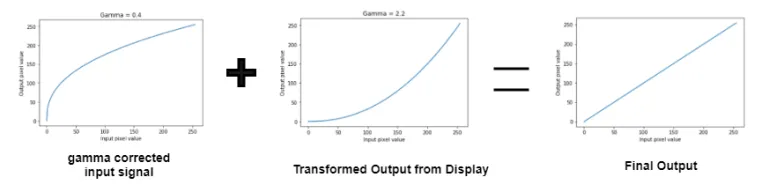

## Menu Driven Implementation 

In [7]:
img=input_image()
original_img=img
choice =1

while(choice!=0):
    
    print('Choose the operation to be performed on image')
    print('MENU')
    print('1. Intensity Level Slicing Without Background')
    print('2. Intensity Level Slicing With Background')
    print('3. Log Transformation')
    print('4. Power Law Transformation')
    print("0. EXIT")

    choice=int(input())
    
    if(choice == 1):
        low_range=int(input('Enter Lower Intensity Range Value:'))
        high_range=int(input('Enter Higer Intensity Range Value:'))                
        img= intensity_slicing_without_background(original_img,low_range,high_range)
        cv2.imshow('Sliced Image Without Background',img)
        cv2.imshow('Original Image',original_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        
    if(choice == 2):
        low_range=int(input('Enter Lower Intensity Range Value:'))
        high_range=int(input('Enter Higer Intensity Range Value:'))                
        img= intensity_slicing_with_background(original_img,low_range,high_range)
        cv2.imshow('Sliced Image With Background',img)
        cv2.imshow('Original Image',original_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    
    
    if(choice == 3):              
        img= logarithm_image(original_img)
        cv2.imshow('Log Transformation',img)
        cv2.imshow('Original Image',original_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
       
    
    if(choice == 4):
        output_disp = float(input("Enter Gamma Value Greater Than 1"))
        corrected_input = float(input("Enter Gamma Value Less Than 1")) 
        img= power_law(original_img, output_disp, corrected_input)
        cv2.imshow('Power Law Transformation',img)
        cv2.imshow('Original Image',original_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

Enter path of the image :E:\Wallpaper\two.jpg
Choose the operation to be performed on image
MENU
1. Intensity Level Slicing Without Background
2. Intensity Level Slicing With Background
3. Log Transformation
4. Power Law Transformation
0. EXIT
1
Enter Lower Intensity Range Value:60
Enter Higer Intensity Range Value:120
Choose the operation to be performed on image
MENU
1. Intensity Level Slicing Without Background
2. Intensity Level Slicing With Background
3. Log Transformation
4. Power Law Transformation
0. EXIT
2
Enter Lower Intensity Range Value:60
Enter Higer Intensity Range Value:120
Choose the operation to be performed on image
MENU
1. Intensity Level Slicing Without Background
2. Intensity Level Slicing With Background
3. Log Transformation
4. Power Law Transformation
0. EXIT
3


<ipython-input-5-ee4eb282c273>:3: RuntimeWarning: divide by zero encountered in log
  img_log = ((np.log(img+1))/(np.log(1+np.max(img))))*255


Choose the operation to be performed on image
MENU
1. Intensity Level Slicing Without Background
2. Intensity Level Slicing With Background
3. Log Transformation
4. Power Law Transformation
0. EXIT
4
Enter Gamma Value Greater Than 12.4
Enter Gamma Value Less Than 10.8
Choose the operation to be performed on image
MENU
1. Intensity Level Slicing Without Background
2. Intensity Level Slicing With Background
3. Log Transformation
4. Power Law Transformation
0. EXIT
0
